# Network Analysis of a Citation network

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

### Create Graph

In [16]:
# Read edge list into graph
gi = ig.Graph.Read_Edgelist('data/edges.txt', directed=True)
gn = nx.read_edgelist('data/edges.txt', create_using=nx.DiGraph)

In [4]:
# Create gexf file format
nx.write_gexf(gn, "data/hep-th.gexf")

### Basic Analysis

In [5]:
node_list = list(gn.nodes)
print("Total nodes: ", len(node_list))

edge_list = gn.edges
print("Total edges: ", len(edge_list))

degree_list = dict(gn.degree).values()
print("Max degree: ", max(degree_list))
print("Min degree: ", min(degree_list))

out_degree_list = dict(gn.out_degree).values()
print("Max out-degree: ", max(out_degree_list))
print("Min out-degree: ", min(out_degree_list))

in_degree_list = dict(gn.in_degree).values()
print("Max in-degree: ", max(in_degree_list))
print("Min in-degree: ", min(in_degree_list))

avg_degree = sum(degree_list)/len(node_list)
print("Average degree: ", avg_degree)

Total nodes:  27770
Total edges:  352807
Max degree:  2468
Min degree:  1
Max out-degree:  562
Min out-degree:  0
Max in-degree:  2414
Min in-degree:  0
Average degree:  25.409218581202737


In [6]:
# Plotting degree dist

def plot_degree_dist(degree_sequence):
    plt.figure("Degree Distribution", figsize=(5, 3))
    plt.bar(*np.unique(degree_sequence, return_counts=True))
    plt.title("In-Degree histogram")
    plt.xlabel("In-Degree")
    plt.ylabel("# of Nodes")
    # plt.ylim(0, 4600)
    plt.show()

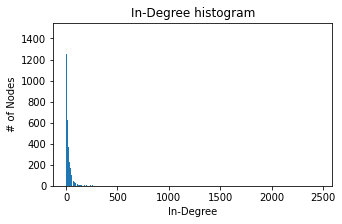

In [7]:
# Total degree distribution

degree_sequence = sorted((d for n, d in gn.degree()), reverse=True)
plot_degree_dist(degree_sequence)

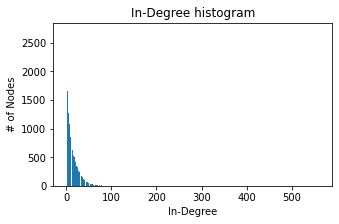

In [8]:
# Out degree distribution

degree_sequence = sorted((d for n, d in gn.out_degree()), reverse=True)
plot_degree_dist(degree_sequence)

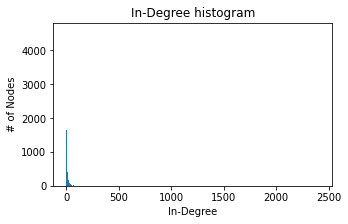

In [9]:
# In degree distribution

degree_sequence = sorted((d for n, d in gn.in_degree()), reverse=True)
plot_degree_dist(degree_sequence)

### Computing Graph Metrics

In [10]:
# Assortativity
nx.degree_assortativity_coefficient(gn)

0.0017156007411713394

In [11]:
# Density
nx.density(gn)

0.0004575105077821084

In [12]:
# Reciprocity
nx.reciprocity(gn)

0.002738040911886669

In [13]:
# No. of triangles (taking too long)
# triangles = gi.cliques(min=3, max=3)
# len(triangles)

In [14]:
# Transitivity
nx.transitivity(gn)

0.13276997672801327

In [15]:
# Eccentricity
eccentricity_list = gi.eccentricity()

### Computing Centralities

In [96]:
# Betweenness
betweenness = gi.betweenness()
betweenness = [betweenness[int(i)] for i in node_list]

In [125]:
top_5_values = sorted(betweenness, reverse=True)[:5]
top_5_indices = [betweenness.index(i) for i in top_5_values]

for i, j in zip(top_5_indices, top_5_values):
    print(i, j)

27769 82689201.01674838
27768 69020550.10148965
27767 68969608.950498
27766 34350962.667975515
27765 28030674.80847053


In [113]:
# Harmonic

harmonic = gi.harmonic_centrality()

In [114]:
harmonic = [harmonic[int(i)] for i in node_indices]
print("Max harmonic centrality: ", max(harmonic))
print("Node: ", node_indices[harmonic.index(max(harmonic))])

Max harmonic centrality:  0.001205813046711459
Node:  9711200


### Graph Coloring

In [16]:
color_dict = nx.greedy_color(gn)
print("Number of colors: ", len(set(color_dict.values())))

Number of colors:  17
